<a href="https://colab.research.google.com/github/gabrielgastaldo/An-lise-de-Inc-ndios-na-Amaz-nia/blob/main/Incendios_Brasil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Incêndios na Amazônia

## Introdução
#### Este projeto visa analisar dados sobre incêndios na região da Amazônia. Vamos explorar a frequência de incêndios ao longo dos anos, a distribuição geográfica e possíveis correlações com fatores ambientais.

##Conjunto de Dados
#### O conjunto de dados utilizado é o “Data Analysis on Amazon Forest Fires”, disponível no Kaggle. Ele contém informações sobre incêndios na Amazônia, incluindo localização, data, área afetada e outros fatores relevantes.

##Problematicas
1. Qual o número total de incêndios?
2. Qual foi o mês com maior ocorrência de incêndios?
3. Que ano teve maior ocorrência de incêndios?
4. Qual foi o estado com maior ocorrência de incêndios?
5. Qual a quantidade de incêndios no Amazonas?
6. Qual a quantidade de incêndios no Amazonas por ano?
7. Qual a quantidade de incêndios no Amazonas por dias da semana?
8. Qual a quantidade de incêndios em 2015 por mês?
9. Qual é a média do número de incêndios reportados do maior para o menor, por estado?
10. Quais foram os estados onde incêndios foram relatados no mês de dezembro?


#Importando bibliotecas e o dataset

In [7]:
# prompt: veja o que está errado import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import locale
# import calendar
# locale.setlocale(locale.LC_TIME, 'pt_BR')

# The import statement `import pandas as pd` is correct. However, the other import statements are not indented correctly. They should be indented with two spaces to maintain the code's readability and consistency.

# Corrected code:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar
locale.setlocale(locale.LC_TIME, 'pt_BR')



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Error: unsupported locale setting

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar

locale.setlocale(locale.LC_TIME, 'pt_BR')


Error: unsupported locale setting

In [ ]:
df = pd.read_csv('amazon.csv', encoding='iso-8859-1')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.tail()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
for col in df[['year', 'state', 'month']]:
    print('Unique values in column: %s' %col)
    print(df[col].unique())
    print('\n')

print('Number of unique values: ')
print(df[['year', 'state', 'month']].nunique())

In [ ]:
df.describe(include='all')

In [ ]:
df['number'].describe()

# Pré-Processamento

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(6422, 5)

In [ ]:
df = df.rename(columns={
    'year': 'ano',
    'state': 'estado',
    'month': 'mes',
    'number': 'incendios',
    'date': 'data'})

In [ ]:
df.columns

Index(['ano', 'estado', 'mes', 'incendios', 'data'], dtype='object')

In [ ]:
df['mes'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
df['mes']=df['mes'].map({'Janeiro': 'Jan',
                        'Fevereiro': 'Fev',
                        'Março': 'Mar',
                        'Abril': 'Abr',
                        'Maio': 'Mai',
                        'Junho': 'Jun',
                        'Julho': 'Jul',
                        'Agosto': 'Ago',
                        'Setembro': 'Set',
                        'Outubro': 'Out',
                        'Novembro': 'Nov',
                        'Dezembro': 'Dez'})

# Análise exploratória de dados

## Número total de incêndios

In [ ]:
print("Número total de incêndios:", df.shape[0])

Número total de incêndios: 6422


## Mês com maior ocorrência de incêndios

In [ ]:
df1 = df.groupby('mes')['incendios'].sum().reset_index()
df1.sort_values(by='incendios', ascending=False, inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.head(1)

,mes,incendios
0,Jul,92319.113


Text(0, 0.5, 'Incêndios')

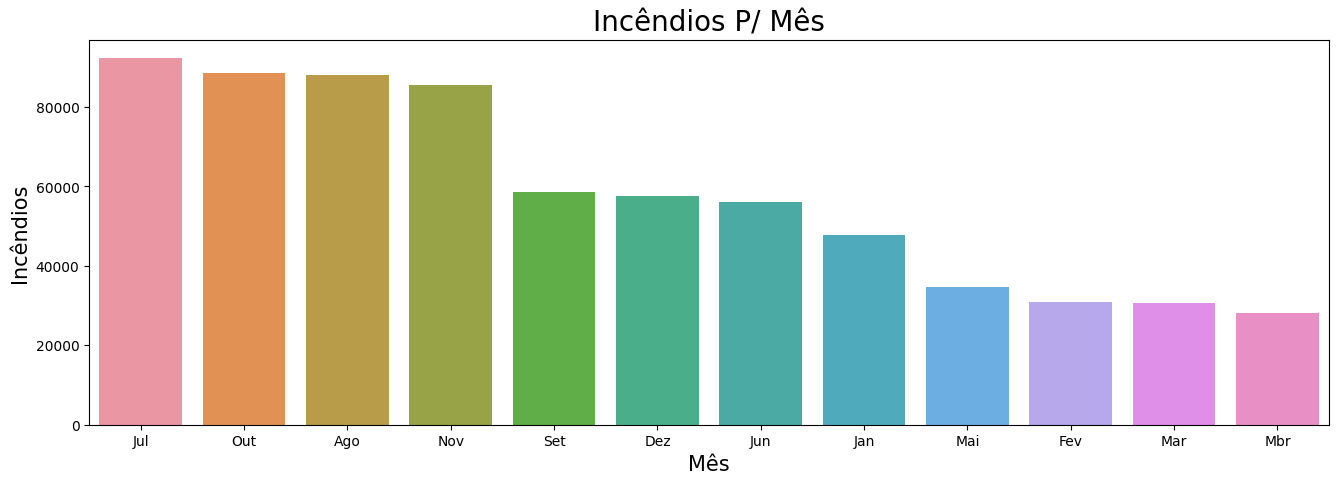

In [ ]:
plt.figure(figsize=(16, 5))
sns.barplot(x = 'mes', y = 'incendios', data=df1)
plt.title('Incêndios P/ Mês', fontsize=20)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)

## Ano com maior ocorrência de incêndios

In [ ]:
df2 = df.groupby('ano')['incendios'].sum().reset_index()
df2

,ano,incendios
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


Text(0, 0.5, 'Incêndios')

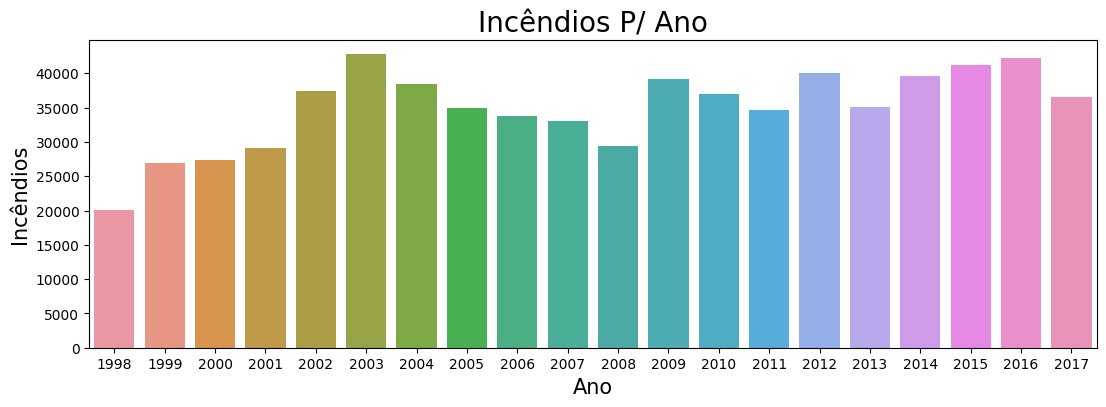

In [ ]:
plt.figure(figsize=(13, 4))
sns.barplot(x = 'ano', y = 'incendios', data=df2)
plt.title('Incêndios P/ Ano', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)

## Estado com maior ocorrência de incêndios

In [ ]:
df3 = df.groupby('estado')['incendios'].sum().reset_index()
df3.sort_values(by='incendios', ascending=False, inplace=True)
df3.reset_index(drop=True, inplace=True)
df3.head(1)

,estado,incendios
0,Mato Grosso,96246.028


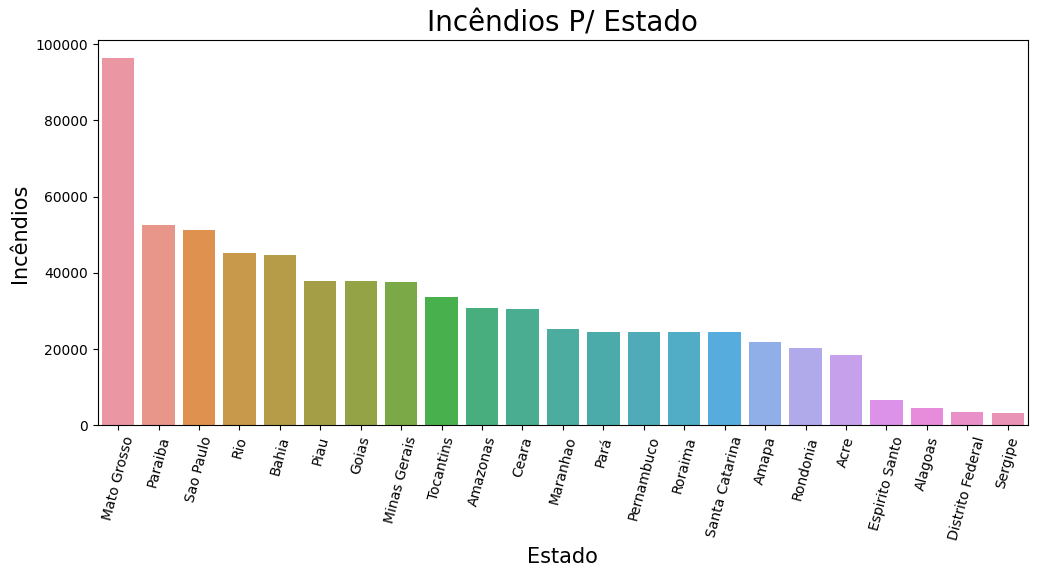

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x = 'estado', y = 'incendios', data=df3)
plt.title('Incêndios P/ Estado', fontsize=20)
plt.xlabel('Estado', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)
plt.xticks(rotation=75)
plt.show()

In [ ]:
df['estado'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

## Quantidade de incêndios no Amazonas

In [ ]:
df[df['estado'] == 'Amazonas']['incendios'].sum()

30650.129

## Quantidade de incêndios no Amazonas por ano

In [ ]:
df4 = df[df['estado']=='Amazonas']
df5 = df4.groupby('ano')['incendios'].sum().reset_index()
df5

,ano,incendios
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


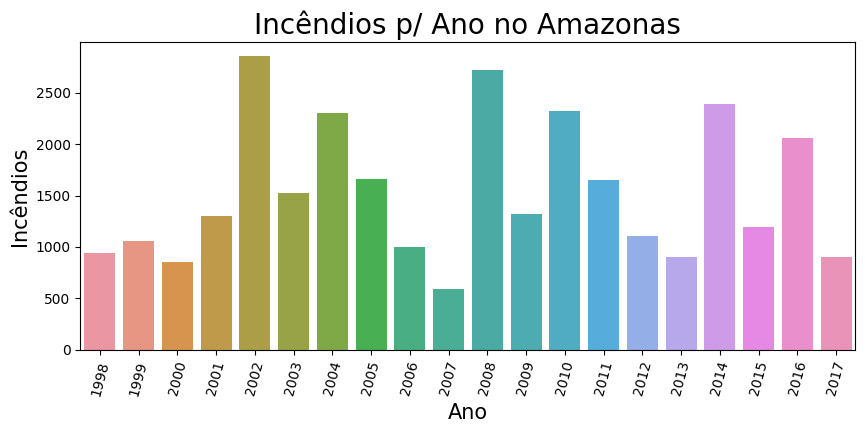

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x = 'ano', y = 'incendios', data=df5)
plt.title('Incêndios p/ Ano no Amazonas', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)
plt.xticks(rotation=75)
plt.show()

## Quantidade de incêndios no Amazonas por dias da semana

In [ ]:
df6 = df4.copy()
dia = df6.groupby(df6['data'].dt.dayofweek).sum().incendios
dia.index = [calendar.day_name[x] for x in range(0,7)]
dia

C:\Users\Usuário\AppData\Local\Temp\ipykernel_16184\1587443924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dia = df6.groupby(df6['data'].dt.dayofweek).sum().incendios


segunda-feira    1886.601
terça-feira      6474.217
quarta-feira     3910.177
quinta-feira     5754.802
sexta-feira      5446.480
sábado           4162.666
domingo          3015.186
Name: incendios, dtype: float64

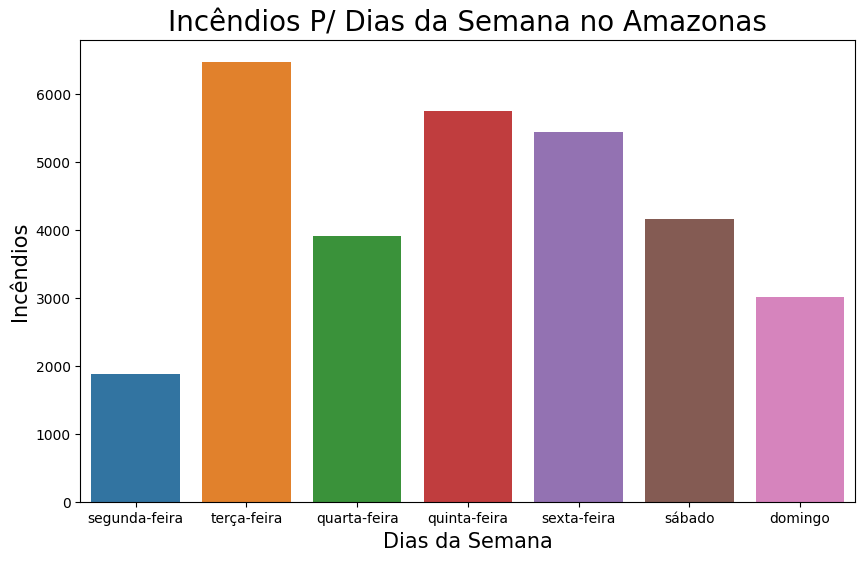

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = dia.index, y = dia.values)
plt.title('Incêndios P/ Dias da Semana no Amazonas', fontsize=20)
plt.xlabel('Dias da Semana', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)
plt.show()

## Quantidade de incêndios em 2015 por mês

In [ ]:
df7 = df[df['ano']==2015].groupby('mes')['incendios'].sum().reset_index()
df7

,mes,incendios
0,Ago,4363.125
1,Dez,4088.522
2,Fev,2309.000
3,Jan,4635.000
4,Jul,4364.392
5,Jun,3260.552
6,Mai,2384.000
7,Mar,2202.000
8,Mbr,2573.000
9,Nov,4034.518


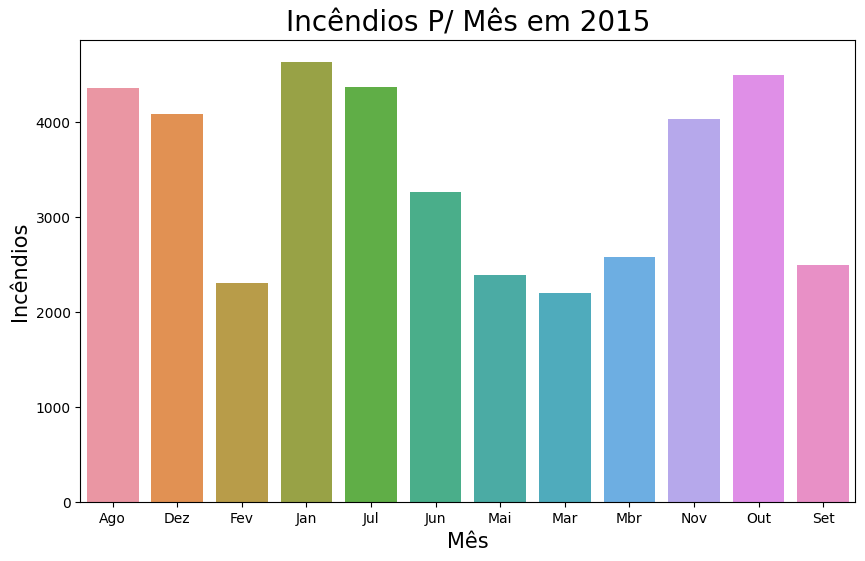

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'mes', y = 'incendios', data=df7)
plt.title('Incêndios P/ Mês em 2015', fontsize=20)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Incêndios', fontsize=15)
plt.show()

## Média do número de incêndios reportados do maior para o menor, por estado

In [ ]:
df8 = df.groupby('estado')['incendios'].mean().sort_values(ascending=False).reset_index()
df8

,estado,incendios
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


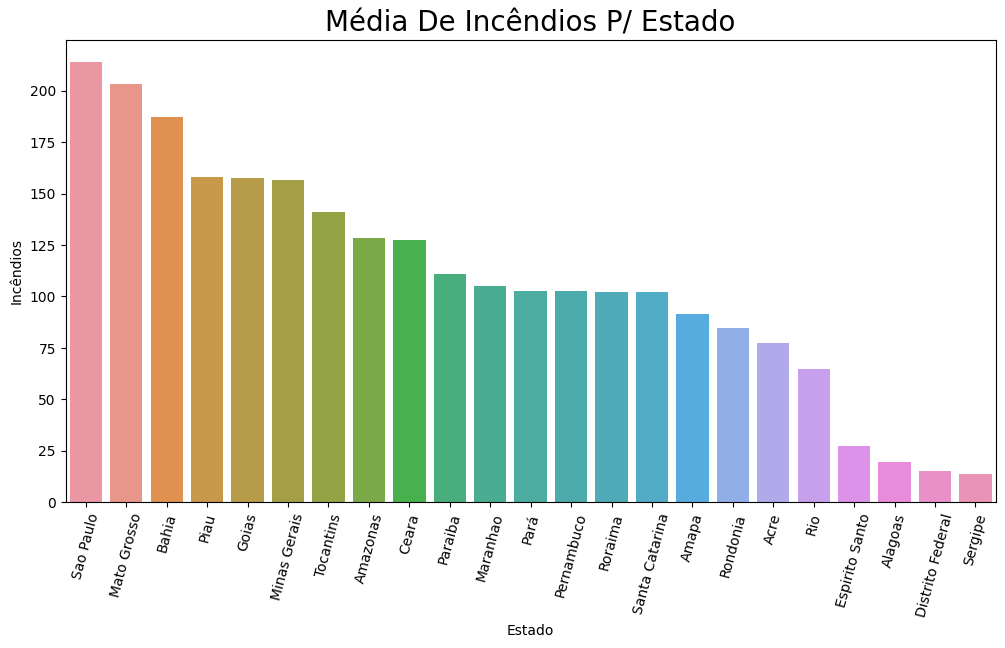

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'estado', y = 'incendios', data=df8)
plt.title('Média De Incêndios P/ Estado', fontsize=20)
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Incêndios', fontsize=10)
plt.xticks(rotation=75)
plt.show()

## Estados onde incêndios foram relatados no mês de dezembro

In [ ]:
df9 = df[df['mes'] == 'Dez']['estado'].unique()
df9

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [ ]:
df10 = df['estado'].unique()

In [ ]:
if (df9 == df10).all():
    print('Todos os estados tiveram ocorrência de incêndio no mês de dezembro')
else:
    for estado in df10:
         if estado not in df9:
            print(f"{estado} não teve ocorrência de incêndios em dezembro.")

Todos os estados tiveram ocorrência de incêndio no mês de dezembro
